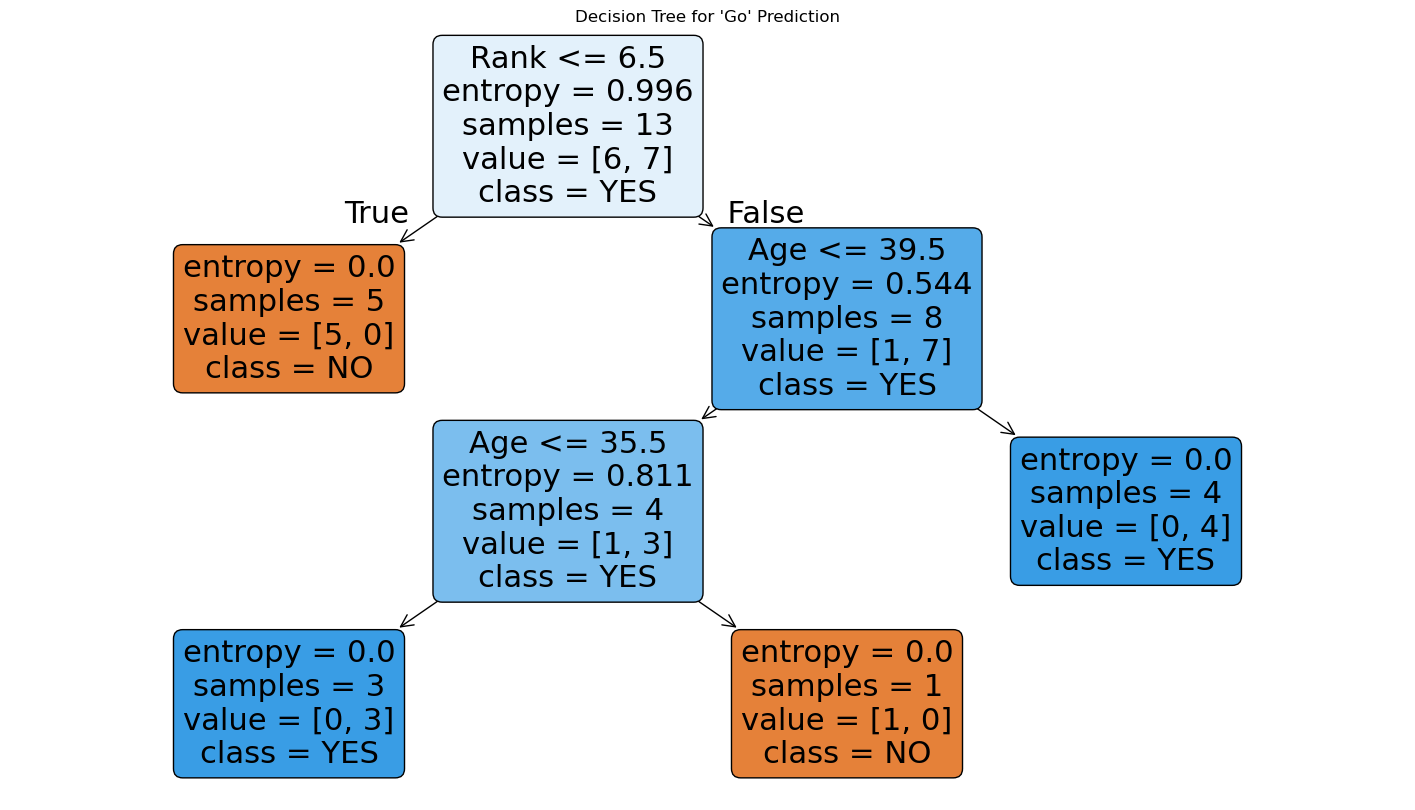

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# ---------------------------------------------------
# 1. Create DataFrame
# ---------------------------------------------------
data = {
    'Age':[36,42,23,52,43,44,66,35,52,35,24,18,45],
    'Experience':[10,12,4,4,21,14,3,14,13,5,3,3,9],
    'Rank':[9,4,6,4,8,5,7,9,7,9,5,7,9],
    'Nationality':['UK','USA','N','USA','USA','UK','N','UK','N','N','USA','UK','UK'],
    'Go':['NO','NO','NO','NO','YES','NO','YES','YES','YES','YES','NO','YES','YES']
}

df = pd.DataFrame(data)

# ---------------------------------------------------
# 2. Data cleaning
# (No missing values here, only encoding needed)
# ---------------------------------------------------
encoder = LabelEncoder()

df['Nationality'] = encoder.fit_transform(df['Nationality'])
df['Go'] = encoder.fit_transform(df['Go'])   # YES = 1, NO = 0

# ---------------------------------------------------
# 3. Features and target
# ---------------------------------------------------
X = df[['Age', 'Experience', 'Rank', 'Nationality']]
y = df['Go']

# ---------------------------------------------------
# 4. Train Decision Tree model
# ---------------------------------------------------
model = DecisionTreeClassifier(
    criterion='entropy',   # Information Gain
    max_depth=3,
    random_state=42
)

model.fit(X, y)

# ---------------------------------------------------
# 5. Plot / Draw the Decision Tree
# ---------------------------------------------------
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['NO', 'YES'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for 'Go' Prediction")
plt.show()
